In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import TruncatedSVD
import timeit
import seaborn as sn
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import pandas as pd

# T-SNE vs PCA

**PCA** va a trabajar respecto de los componentes, mientras que **T-SNE** crear una distribución de probabilidad que represente las similitudes entre vecinos en un espacio de gran dimensión y en un espacio de menor dimensión.

#### Diferencia

**T-SNE** a diferencia de **PCA** va a intentar que los puntos que se encuentran a una disntancia en n dimensiones, se encuentren a la misma distancia en k dimensiones.

In [3]:
SAMPLE_FOR_PLOTTING = 10000

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [5]:
X = X.values
y = y.values

In [6]:
permut = np.random.permutation(X.shape[0])
X = X[permut,:][:SAMPLE_FOR_PLOTTING,:]
y = y[permut][:SAMPLE_FOR_PLOTTING]
X.shape

(10000, 784)

In [7]:
start = timeit.default_timer()
X_tsne = TSNE(n_components=2).fit_transform(X)
elapsed_tsne = timeit.default_timer() - start

Tenemos el resultado obtenido por reducción de dimensión con el método t-SNE.  T-SNE ha logrado agrupar los datos cercanos y separar los datos diferentes. 

Text(0.5, 1.0, 'TSNE para MNIST terminado en 38.88 segundos')

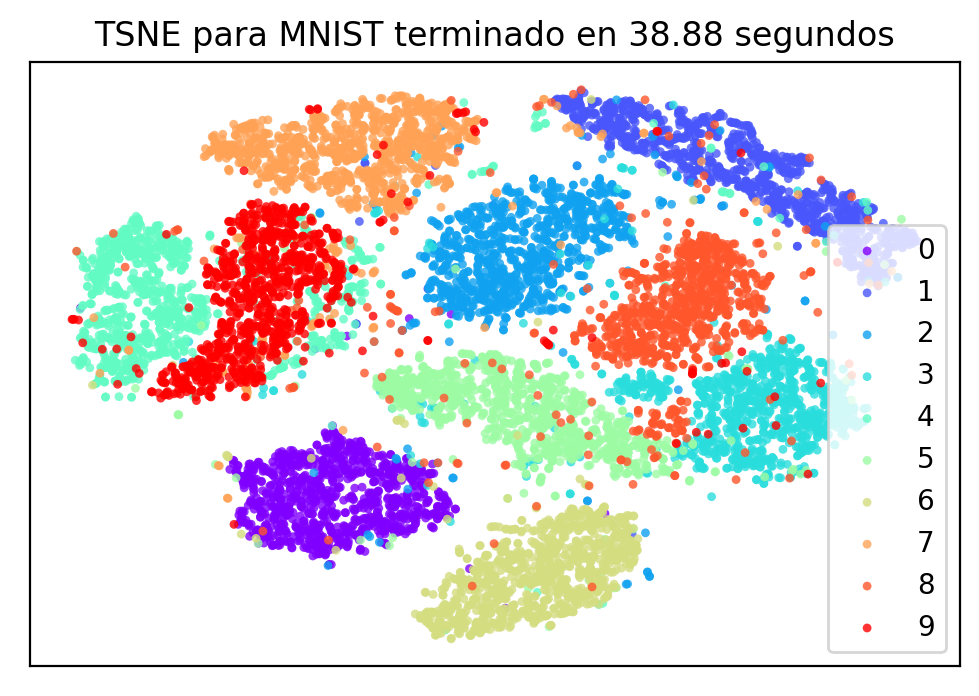

In [8]:
plt.figure(dpi=200)
label_list = sorted(list(set(y)))
colors = cm.rainbow(np.linspace(0, 1, len(label_list)))
for i in range(len(label_list)):
    x_plot=[X_tsne[:, 0][j] for j in range(len(list(y))) if y[j]==label_list[i]]
    y_plot=[X_tsne[:, 1][j] for j in range(len(list(y))) if y[j]==label_list[i]]
    plt.scatter(x_plot, y_plot, edgecolors='none', s=10, label=label_list[i], color=colors[i], alpha=0.8)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.title("TSNE para MNIST terminado en %.2f segundos" % elapsed_tsne)

In [9]:
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [10]:
principalComponents = pca.fit_transform(X)
# reconstruimos el data frame para poder representarlo
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
# concatenamos los valores de species para poder reconstruir el set de datos.
finalDf = pd.concat([principalDf, pd.Series(y)], axis = 1)
finalDf = finalDf.rename(columns={0:"numero"})

In [12]:
finalDf

,principal component 1,principal component 2,numero
0,1154.820499,-77.405407,0
1,-299.581254,-971.926544,7
2,356.328816,25.294379,8
3,-782.629307,785.658364,1
4,-22.465371,-1107.199378,7
...,...,...,...
9995,307.551920,39.535609,3
9996,352.763258,144.281913,8
9997,-649.579063,34.072959,1
9998,2170.829353,60.794254,0


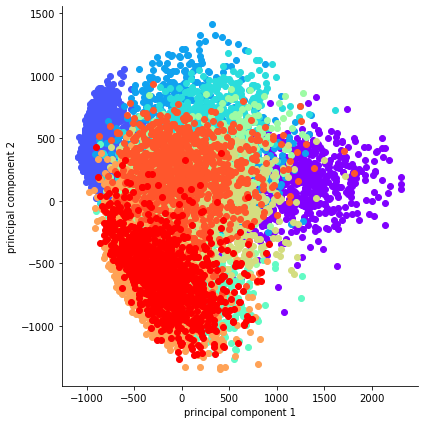

In [16]:
sn.FacetGrid(finalDf,hue='numero', size=6,palette=colors).map(plt.scatter,'principal component 1',"principal component 2").add_legend
plt.show()

Los resultados obtenidos con PCA, la separación de datos en el espacio en 2 dimensiones es mucho menos clara.